In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
#### Uncomment to read-in the data

# # Reading in the data

url = "https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_lightcurves.csv"
lc = pd.read_csv(url)

In [5]:
lc.shape

(440469, 5)

In [6]:
lc.head()

,ID,observation_id,Mag,Magerr,MJD
0,TranID1409030010044114444,0,18.8765,0.166417,53766.089871
1,TranID1409030010044114444,1,20.0519,0.281733,53990.458866
2,TranID1409030010044114444,2,20.2199,0.295764,53996.286004
3,TranID1409030010044114444,3,21.1192,0.495390,54385.205789
4,TranID1409030010044114444,4,19.3289,0.195002,54355.282285


# Getting Unique IDs from the data

In [7]:
# Getting the Unique ID and storing them in a list

unique_ID = []

for k in range(1,len(lc.ID)):

    if lc.ID.iloc[k-1] != lc.ID.iloc[k]:

        unique_ID.append(lc.ID.iloc[k-1])

# Appending the last data since the loop above goes
# up to len(lc.ID)-1
unique_ID.append(lc.ID.iloc[-1])

In [8]:
Lc_len = [] # List to store the duration of the lc

d = []      # List to store data for a unique ID as
            # by the code above

    
#  Storing the datasets of the unique ID in a the 'd' 
#  list
for i in unique_ID:
    
    z = lc[lc['ID']==i]
    d.append(z)
    
    # calculating the duration of the lcs
    Lc_len.append(np.sort(z.MJD)[-1] - np.sort(z.MJD)[0])
    



# Ploting first 4 light curves of the unique IDs

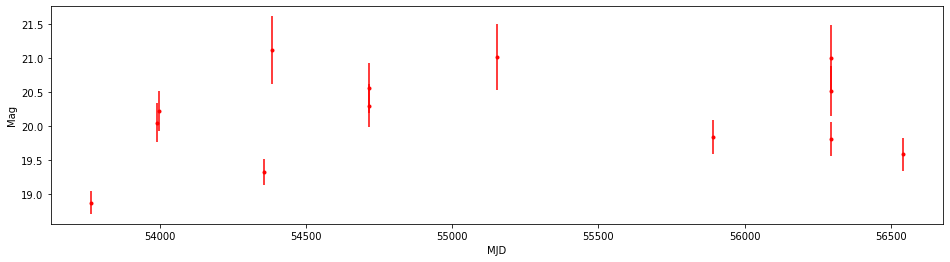

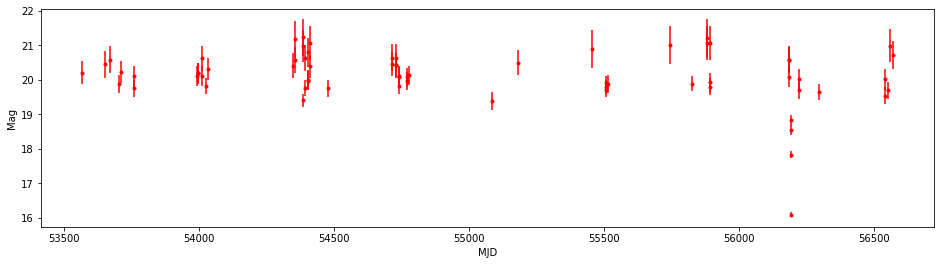

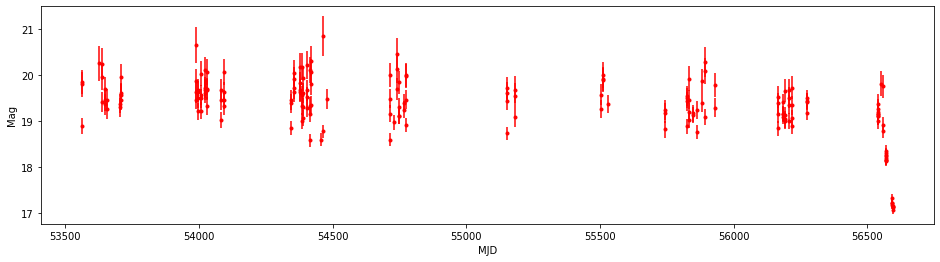

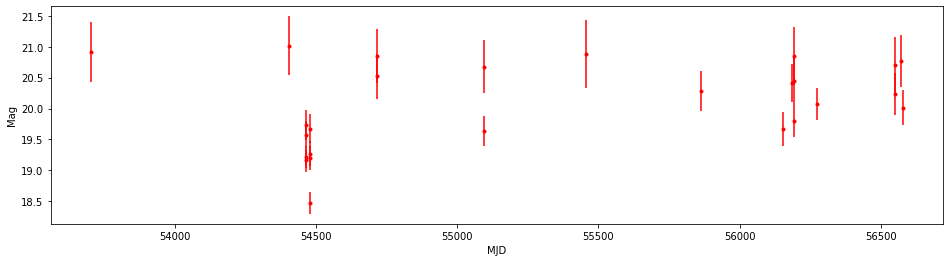

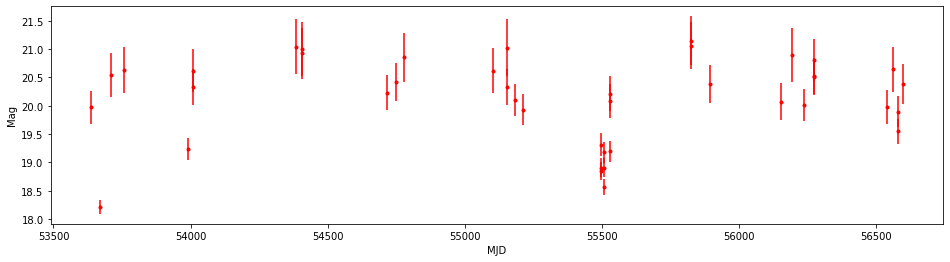

In [9]:
# Plotting light curves for the first 4 unique IDs as by the code above
for i in range(5):
    plt.figure(figsize=(16,4))
    plt.errorbar(d[i].MJD,d[i].Mag,yerr=d[i].Magerr,
                 fmt='.r',color='r')

    plt.xlabel('MJD')
    plt.ylabel('Mag')
    plt.savefig('Light_Curve'+str(i)+'.png')
    plt.show()

# Plotting a histogram with the light curve durations

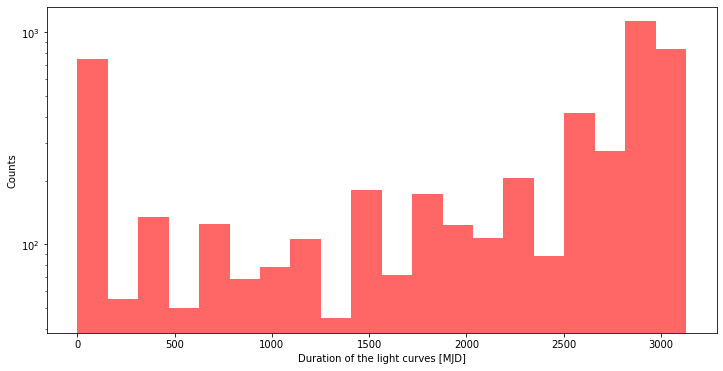

In [10]:
plt.figure(figsize=(12,6))
plt.hist(Lc_len,color='red',alpha=0.6, bins=20)
plt.xlabel('Duration of the light curves [MJD]')
plt.ylabel('Counts')
plt.yscale('log')
plt.savefig('lc_duration.png')
plt.show()


# Zero light curve length



* From the plot above we can see that several light curves (lc) have zero lengths


* The code below investigates this light curves in detail


* We have found that the light curves with zero lengths have a single point in their observations


* The paper does not say anything about this light curves

In [11]:
# Saving indeces where the light curve 
# length/duration is zero.

Zero_Lenth_lc = []
for i in range (len(Lc_len)):
    
    if Lc_len[i] == 0: 
        Zero_Lenth_lc.append(i)
        
# Checking the indices in obtained above
# in the original data

d[Zero_Lenth_lc[0]] 

print('Number of transients = {} according to the code above'.format(len(unique_ID) - len(Zero_Lenth_lc)))

Number of transients = 4836 according to the code above
